Surface Equation:
voltage_y = -0.2048878672200778 * y^2 + 0.05780022255294204 * z^2 + -0.1735072394427677 * y * z + 15.117362041675069 * y + 2.3824945932810886 * z + -215.99112864204935


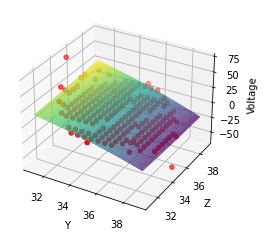

In [6]:
# steering voltage equation in y direction on extraction electrode
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

def surface_equation(coords, a, b, c, d, e, g):
    y, z = coords
    return a*y**2 + b*z**2 + c*y*z + d*y + e*z + g 

ndata = np.genfromtxt("data\\ke_20\\ExtractionSteering2DScan_data.csv", delimiter=",")
y = ndata[1:, 0]
z = ndata[1:, 1]
vy = ndata[1:, 3]
#vz = ndata[1:, 4]

popt, _ = curve_fit(surface_equation, (y, z), vy)

a, b, c, d, e, g = popt

equation = f"voltage_y = {a} * y^2 + {b} * z^2 + {c} * y * z + {d} * y + {e} * z + {g}"
print("Surface Equation:")
print(equation)

# Generate meshgrid for plotting
num_points = 100
y_range = np.linspace(min(y), max(y), num_points)
z_range = np.linspace(min(z), max(z), num_points)
Y, Z = np.meshgrid(y_range, z_range)
VY = surface_equation((Y, Z), a, b, c, d, e, g)

# Plotting the data and surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, z, vy, c='red', label='Data')
ax.plot_surface(Y, Z, VY, cmap='viridis', alpha=0.8, label='Fitted Surface')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('Voltage')
#ax.legend()

plt.show()

In [4]:
def vol(y, z):
    return -1.7611062324328426 * (y**2) + -0.3822379368345914 * (z**2) + -0.33237792792796905 * y * z + 73.38340253035119 * y + 34.61208769283763 * z + -744.232701595141
print(vol(36.5,37.75))

-108.0541642954513


Surface Equation:
voltage_z = -0.21820190793604488 * y^2 + -0.018378603015058337 * z^2 + 0.10890148026244129 * y * z + 5.924875011900872 * y + 36.6353523958675 * z + -1332.4515645293457


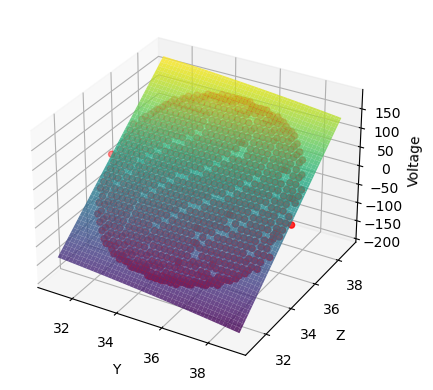

In [1]:
# steering voltage equation in z direction on extraction electrode
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

def surface_equation(coords, a, b, c, d, e, g):
    y, z = coords
    return a*y**2 + b*z**2 + c*y*z + d*y + e*z + g 

ndata = np.genfromtxt("ExtractionSteering2DScan_data.csv", delimiter=",")
y = ndata[1:, 0]
z = ndata[1:, 1]
#vy = ndata[1:, 3]
vz = ndata[1:, 4]

popt, _ = curve_fit(surface_equation, (y, z), vz)

a, b, c, d, e, g = popt

equation = f"voltage_z = {a} * y^2 + {b} * z^2 + {c} * y * z + {d} * y + {e} * z + {g}"
print("Surface Equation:")
print(equation)

# Generate meshgrid for plotting
num_points = 100
y_range = np.linspace(min(y), max(y), num_points)
z_range = np.linspace(min(z), max(z), num_points)
Y, Z = np.meshgrid(y_range, z_range)
VZ = surface_equation((Y, Z), a, b, c, d, e, g)

# Plotting the data and surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, z, vz, c='red', label='Data')
ax.plot_surface(Y, Z, VZ, cmap='viridis', alpha=0.8, label='Fitted Surface')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('Voltage')
#ax.legend()

plt.show()

In [7]:
def vol_z(y, z):
    return -0.21820190793604488 * (y**2) + -0.018378603015058337 * (z**2) + 0.10890148026244129 * y * z + 5.924875011900872 * y + 36.6353523958675 * z + -1332.4515645293457
print(vol_z(36.5,37))

70.5260617711499


In [33]:
# steering voltage equation in x direction on SEL electrode
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

def surface_equation(coords, c00, c10, c01, c20, c11, c02, c30, c21, c12, c03, c40, c31, c22, c13, c04, c50, c41, c32, c23, c14, c05):
    y, z = coords
    return c00 + c10 * z + c01 * y + c20 * z**2 + c11 * z * y + c02 * y**2 + c30 * z**3 + c21 * z**2 * y + c12 * z * y**2 + c03 * y**3 + c40 * z**4 + c31 * z**3 * y + c22 * z**2 * y**2 + c13 * z * y**3 + c04 * y**4 + c50 * z**5 + c41 * z**4 * y + c32 * z**3 * y**2 + c23 * z**2 * y**3 + c14 * z * y**4 + c05 * y**5

ndata = np.genfromtxt("SelSteering2DScan_data.csv", delimiter=",")
y = ndata[1:, 0]
z = ndata[1:, 1]
vx = ndata[1:, 3]
#vz = ndata[1:, 4]

popt, _ = curve_fit(surface_equation, (y, z), vx)

c00, c10, c01, c20, c11, c02, c30, c21, c12, c03, c40, c31, c22, c13, c04, c50, c41, c32, c23, c14, c05 = popt

equation = f"voltage_x = {c00} + {c10} * z + {c01} * y + {c20} * z**2 + {c11} * z * y + {c02} * y**2 + {c30} * z**3 + {c21} * z**2 * y + {c12} * z * y**2 + {c03} * y**3 + {c40} * z**4 + {c31} * z**3 * y + {c22} * z**2 * y**2 + {c13} * z * y**3 + {c04} * y**4 + {c50} * z**5 + {c41} * z**4 * y + {c32} * z**3 * y**2 + {c23} * z**2 * y**3 + {c14} * z * y**4 + {c05} * y**5"
print("Surface Equation:")
print(equation)

# Generate meshgrid for plotting
num_points = 1000
y_range = np.linspace(min(y), max(y), num_points)
z_range = np.linspace(min(z), max(z), num_points)
Y, Z = np.meshgrid(y_range, z_range)
VX = surface_equation((Y, Z), c00, c10, c01, c20, c11, c02, c30, c21, c12, c03, c40, c31, c22, c13, c04, c50, c41, c32, c23, c14, c05)

%matplotlib qt
#%matplotlib inline
# Plotting the data and surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, z, vx, c='red', label='Data')
ax.plot_surface(Y, Z, VX, cmap='viridis', alpha=0.5, label='Fitted Surface')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Voltage')
ax.axes.set_zlim3d(bottom=-250, top=250)
#ax.legend()

plt.show()

Surface Equation:
voltage_x = 10087254.630262032 + -121562.1479776228 * z + -1310328.146080931 * y + -3.2745854141909576 * z**2 + 13438.728033797217 * z * y + 67786.11719698411 * y**2 + 1.9566578657161542 * z**3 + 2.6343353449612006 * z**2 * y + -565.9240363505908 * z * y**2 + -1739.9382548184028 * y**3 + 1.4013829745679636 * z**4 + -5.800480758515995 * z**3 * y + 8.481040565365184 * z**2 * y**2 + 4.982940317735436 * z * y**3 + 23.503864605714757 * y**4 + -0.014055090989119813 * z**5 + 0.031125138015378452 * z**4 * y + 0.020274094991902337 * z**3 * y**2 + -0.0992725645264072 * z**2 * y**3 + 0.01412947635768054 * z * y**4 + -0.13639061755143983 * y**5


In [34]:
def vol_x(y, z):
    return 10087254.630262032 + -121562.1479776228 * z + -1310328.146080931 * y + -3.2745854141909576 * z**2 + 13438.728033797217 * z * y + 67786.11719698411 * y**2 + 1.9566578657161542 * z**3 + 2.6343353449612006 * z**2 * y + -565.9240363505908 * z * y**2 + -1739.9382548184028 * y**3 + 1.4013829745679636 * z**4 + -5.800480758515995 * z**3 * y + 8.481040565365184 * z**2 * y**2 + 4.982940317735436 * z * y**3 + 23.503864605714757 * y**4 + -0.014055090989119813 * z**5 + 0.031125138015378452 * z**4 * y + 0.020274094991902337 * z**3 * y**2 + -0.0992725645264072 * z**2 * y**3 + 0.01412947635768054 * z * y**4 + -0.13639061755143983 * y**5
print(vol_x(35,39))

7.087068541906774


In [35]:
# steering voltage equation in z direction on SEL electrode
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

def surface_equation(coords, c00, c10, c01, c20, c11, c02, c30, c21, c12, c03, c40, c31, c22, c13, c04, c50, c41, c32, c23, c14, c05):
    y, z = coords
    return c00 + c10 * z + c01 * y + c20 * z**2 + c11 * z * y + c02 * y**2 + c30 * z**3 + c21 * z**2 * y + c12 * z * y**2 + c03 * y**3 + c40 * z**4 + c31 * z**3 * y + c22 * z**2 * y**2 + c13 * z * y**3 + c04 * y**4 + c50 * z**5 + c41 * z**4 * y + c32 * z**3 * y**2 + c23 * z**2 * y**3 + c14 * z * y**4 + c05 * y**5

ndata = np.genfromtxt("SelSteering2DScan_data.csv", delimiter=",")
y = ndata[1:, 0]
z = ndata[1:, 1]
#vx = ndata[1:, 3]
vz = ndata[1:, 4]

popt, _ = curve_fit(surface_equation, (y, z), vz)

c00, c10, c01, c20, c11, c02, c30, c21, c12, c03, c40, c31, c22, c13, c04, c50, c41, c32, c23, c14, c05 = popt

equation = f"voltage_z = {c00} + {c10} * z + {c01} * y + {c20} * z**2 + {c11} * z * y + {c02} * y**2 + {c30} * z**3 + {c21} * z**2 * y + {c12} * z * y**2 + {c03} * y**3 + {c40} * z**4 + {c31} * z**3 * y + {c22} * z**2 * y**2 + {c13} * z * y**3 + {c04} * y**4 + {c50} * z**5 + {c41} * z**4 * y + {c32} * z**3 * y**2 + {c23} * z**2 * y**3 + {c14} * z * y**4 + {c05} * y**5"
print("Surface Equation:")
print(equation)

# Generate meshgrid for plotting
num_points = 1000
y_range = np.linspace(min(y), max(y), num_points)
z_range = np.linspace(min(z), max(z), num_points)
Y, Z = np.meshgrid(y_range, z_range)
VZ = surface_equation((Y, Z), c00, c10, c01, c20, c11, c02, c30, c21, c12, c03, c40, c31, c22, c13, c04, c50, c41, c32, c23, c14, c05)

%matplotlib qt
#%matplotlib inline
# Plotting the data and surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, z, vz, c='red', label='Data')
ax.plot_surface(Y, Z, VZ, cmap='viridis', alpha=0.5, label='Fitted Surface')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Voltage')
ax.axes.set_zlim3d(bottom=-250, top=250)
#ax.legend()

plt.show()

Surface Equation:
voltage_z = -1817788.6878675346 + -103325.66577648229 * z + 359166.4921829604 * y + 10000.686317260099 * z**2 + -7913.017376700021 * z * y + -16539.181870134842 * y**2 + -297.53732741846704 * z**3 + 28.673766343470888 * z**2 * y + 309.0828292256184 * z * y**2 + 369.3679638405144 * y**3 + 4.083720486509662 * z**4 + 0.7240002175974358 * z**3 * y + -1.8933433659049201 * z**2 * y**2 + -4.617364516212452 * z * y**3 + -4.122233394097373 * y**4 + -0.022218850851347956 * z**5 + -0.005456270079102296 * z**4 * y + 0.0004093181223296258 * z**3 * y**2 + 0.017672293397350075 * z**2 * y**3 + 0.024139418492839165 * z * y**4 + 0.018714178924956276 * y**5


In [36]:
def vol_z(y, z):
    return  -1817788.6878675346 + -103325.66577648229 * z + 359166.4921829604 * y + 10000.686317260099 * z**2 + -7913.017376700021 * z * y + -16539.181870134842 * y**2 + -297.53732741846704 * z**3 + 28.673766343470888 * z**2 * y + 309.0828292256184 * z * y**2 + 369.3679638405144 * y**3 + 4.083720486509662 * z**4 + 0.7240002175974358 * z**3 * y + -1.8933433659049201 * z**2 * y**2 + -4.617364516212452 * z * y**3 + -4.122233394097373 * y**4 + -0.022218850851347956 * z**5 + -0.005456270079102296 * z**4 * y + 0.0004093181223296258 * z**3 * y**2 + 0.017672293397350075 * z**2 * y**3 + 0.024139418492839165 * z * y**4 + 0.018714178924956276 * y**5
print(vol_z(35,39))

36.332642690395005
